## Car Features and MSRP

In [ ]:
pip install opendatasets --upgrade --quiet

## Download data

In [ ]:
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_url="https://www.kaggle.com/CooperUnion/cardataset"

od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshalsingh
Your Kaggle Key: ··········


100%|██████████| 103k/103k [00:00<00:00, 27.0MB/s]

In [ ]:
dataset="./cardataset/data.csv"

#Data Cleaning

In [ ]:
import pandas as pd 
df=pd.read_csv(dataset)

In [ ]:
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [ ]:
missing_values=df.isnull().sum().sort_values(ascending=False)/len(df)
print(df.shape)
print(missing_values)

(11914, 16)
Market Category      0.314084
Engine HP            0.005792
Engine Cylinders     0.002518
Number of Doors      0.000504
Engine Fuel Type     0.000252
MSRP                 0.000000
Popularity           0.000000
city mpg             0.000000
highway MPG          0.000000
Vehicle Style        0.000000
Vehicle Size         0.000000
Driven_Wheels        0.000000
Transmission Type    0.000000
Year                 0.000000
Model                0.000000
Make                 0.000000
dtype: float64


- In Market Category 30% of the data is missing

In [ ]:
#Drop all the missing values

df1=df.dropna(axis=0)

df1.shape

(8084, 16)

In [ ]:
df1.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               8084 non-null   object 
 1   Model              8084 non-null   object 
 2   Year               8084 non-null   int64  
 3   Engine Fuel Type   8084 non-null   object 
 4   Engine HP          8084 non-null   float64
 5   Engine Cylinders   8084 non-null   float64
 6   Transmission Type  8084 non-null   object 
 7   Driven_Wheels      8084 non-null   object 
 8   Number of Doors    8084 non-null   float64
 9   Market Category    8084 non-null   object 
 10  Vehicle Size       8084 non-null   object 
 11  Vehicle Style      8084 non-null   object 
 12  highway MPG        8084 non-null   int64  
 13  city mpg           8084 non-null   int64  
 14  Popularity         8084 non-null   int64  
 15  MSRP               8084 non-null   int64  
dtypes: float64(3), int64(5)

In [ ]:
df1.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8084.000000,8.084000e+03
mean,2012.058634,274.642751,5.778080,3.414151,26.650915,19.553686,1499.397823,5.007267e+04
std,6.317981,115.003475,1.886088,0.898087,7.720473,7.159964,1413.855615,7.029313e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2010.000000,192.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.591875e+04
50%,2015.000000,264.000000,6.000000,4.000000,26.000000,18.000000,1013.000000,3.500500e+04
75%,2016.000000,320.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.872250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
df1.isnull().sum().value_counts()

0    16
dtype: int64

In [ ]:
df1.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
df1.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [ ]:
print(len(df1.Make.unique()))
print(len(df1.Model.unique()))
print(len(df1.Year.unique()))

47
713
28


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
sc=StandardScaler()

In [ ]:
columns=['Make','Model','Year','Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size','Vehicle Style']

In [ ]:
df2=df1
for i in columns:
  df2[i]=le.fit_transform(df2[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,21,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,21,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650
2,4,0,21,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,36350
3,4,0,21,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,29450
4,4,0,21,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,34500


In [ ]:
target=df2['MSRP']
data=df2.drop(columns=['MSRP'])
data.head(0)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(data,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
print(r2_score(lr.predict(data),target))

0.005883116141069511


In [ ]:
df4=df2
df4=sc.fit_transform(df4)

In [ ]:
df4=pd.DataFrame(df4)
df4.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.249586,-1.682100,-0.167569,0.08872,0.524862,0.117669,1.849383,1.135701,-1.574724,-0.172361,-1.160599,0.097582,-0.084316,-0.077336,1.709334,-0.056021
1,-1.249586,-1.686815,-0.167569,0.08872,0.220505,0.117669,1.849383,1.135701,-1.574724,1.082765,-1.160599,-0.299924,0.174752,-0.077336,1.709334,-0.134057
2,-1.249586,-1.686815,-0.167569,0.08872,0.220505,0.117669,1.849383,1.135701,-1.574724,0.952924,-1.160599,0.097582,0.174752,0.062338,1.709334,-0.195233


In [ ]:
target2=df4[15]
data2=df4.drop(columns=[15])

In [ ]:
lr.fit(data2,target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(r2_score(lr.predict(data2),target2))

0.005883116141068623


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data2,target2,test_size=0.2)

In [ ]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
pc=Perceptron()

In [ ]:
Result=lr.predict(x_train)

In [ ]:
print(Result)

[-0.11242355 -0.61642135 -0.08906166 ... -0.56467484 -0.82658414
 -0.00167263]


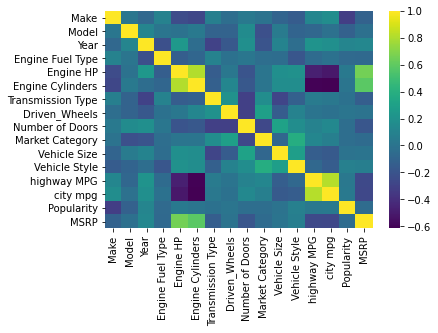

In [ ]:
df_corr=df1.corr()
sns.heatmap(df_corr,cmap='viridis')
plt.show()

In [ ]:
df1.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

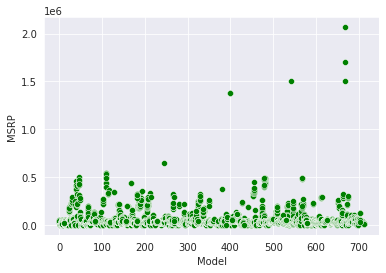

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(x=df1['Model'],y=df1['MSRP'],color="green",markers='*')

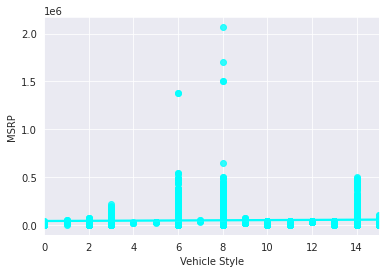

In [ ]:
sns.regplot(x=df1['Vehicle Style'],y=df1['MSRP'],color='cyan')

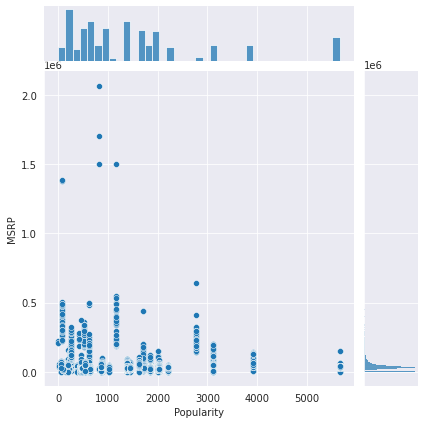

In [ ]:
sns.jointplot(x=df1["Popularity"],y=df1['MSRP'])

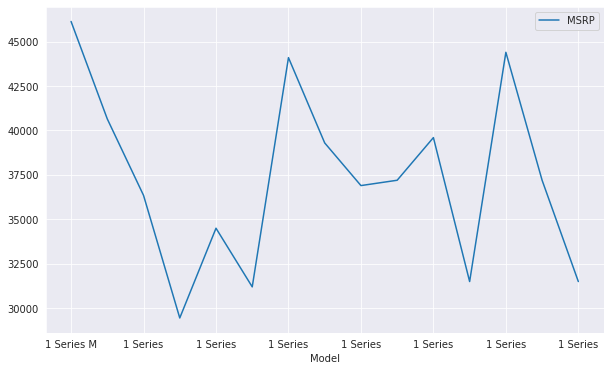

In [ ]:
df[:15].plot(x='Model',y='MSRP',figsize=(10,6),grid=True)

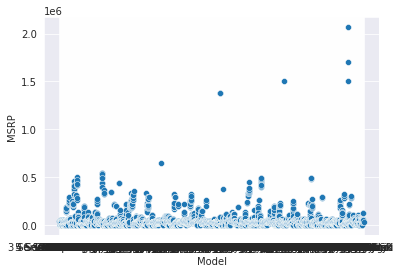

In [ ]:
sns.scatterplot(x=df.Model,y=df.MSRP)

In [ ]:
df.columns
df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


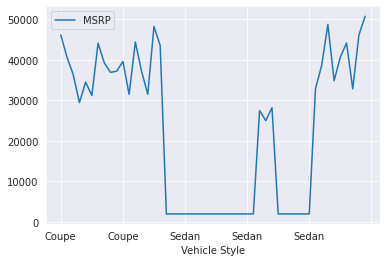

In [ ]:
df[:50].plot(x="Vehicle Style",y="MSRP")

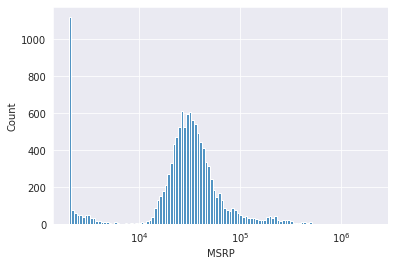

In [ ]:
sns.histplot(df.MSRP,log_scale=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()

In [ ]:
x1=x_train
y1=y_train
x1=poly.fit_transform(x1)

In [ ]:
lr.fit(x1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(r2_score(lr.predict(x1),y1))

0.7451648402494755


In [ ]:
x2=poly.fit_transform(x_test)

In [ ]:
lr.fit(x2,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
print(r2_score(lr.predict(x2),y_test))

0.7083422628854588


In [ ]:
lr.predict(x1)

array([ 0.13068376, -0.00554332, -0.43752322, ..., -0.71739567,
       -0.62689715, -0.24784078])

In [ ]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [ ]:
df2.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,21,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,21,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650


In [ ]:
un_tt=df2['Transmission Type'].unique()
un_tt

array([3, 1, 0, 2, 4])

In [ ]:
unique_tt=df2.groupby('Transmission Type')['Transmission Type'].sum()
unique_tt

Transmission Type
0       0
1    5761
2      30
3    5085
4      12
Name: Transmission Type, dtype: int64

No handles with labels found to put in legend.


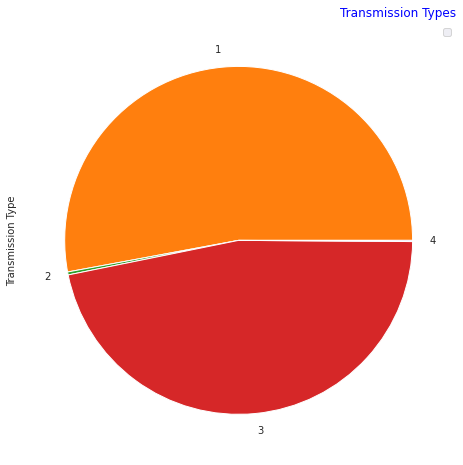

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Transmission Types",color="blue",loc="right")
plt.legend()
unique_tt.plot(kind='pie')
plt.show()

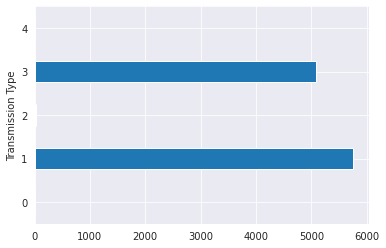

In [ ]:
unique_tt.plot(kind='barh')

In [ ]:
df2.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
df2.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,4,1,21,6,335.0,6.0,3,3,2.0,37,0,8,26,19,3916,46135
1,4,0,21,6,300.0,6.0,3,3,2.0,66,0,6,28,19,3916,40650
2,4,0,21,6,300.0,6.0,3,3,2.0,63,0,8,28,20,3916,36350
3,4,0,21,6,230.0,6.0,3,3,2.0,66,0,8,28,18,3916,29450
4,4,0,21,6,230.0,6.0,3,3,2.0,62,0,6,28,18,3916,34500


In [ ]:
len(df2['Driven_Wheels'].unique())

4

In [ ]:
un_size=df2.groupby('Vehicle Size')['Vehicle Size'].sum()
un_size

Vehicle Size
0       0
1    1858
2    6374
Name: Vehicle Size, dtype: int64

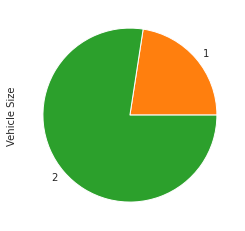

In [ ]:
un_size.plot(kind='pie')

In [ ]:
df["Vehicle Size"]

0        Compact
1        Compact
2        Compact
3        Compact
4        Compact
          ...   
11909    Midsize
11910    Midsize
11911    Midsize
11912    Midsize
11913    Midsize
Name: Vehicle Size, Length: 11914, dtype: object

In [ ]:
un_dd=df2.Driven_Wheels.value_counts()
un_dd

2    2879
3    2401
0    2158
1     646
Name: Driven_Wheels, dtype: int64

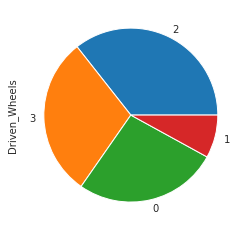

In [ ]:
un_dd.plot(kind='pie')

In [ ]:
un_1=df['Vehicle Size'].value_counts()
un_1

Compact    4764
Midsize    4373
Large      2777
Name: Vehicle Size, dtype: int64

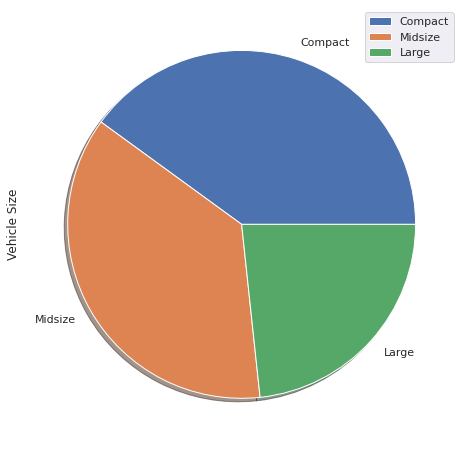

In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme()
un_1.plot(kind='pie',shadow=True)
plt.legend()

([<matplotlib.patches.Wedge at 0x7f2fdec1f910>,
 [Text(0.34036000112496884, 1.0460186755666514, ''),
  Text(-0.952434488283513, -0.5503349394033811, ''),
  Text(0.818028389033103, -0.7354111467307975, '')])

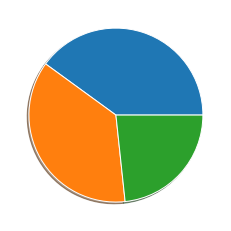

In [ ]:
plt.pie(un_1,shadow=True)